# Nanocompore SampComp API demo 

In [5]:
import shelve
from pprint import pprint as pp

with shelve.open("./results/out_SampComp.db", flag='r') as db:
    a= db["ref_0001"][64]["txComp"]
    b = db["__metadata"]

pp(a)
pp(b)

{'GMM_logit_model': {'coef': -3.932225712745665,
                     'model': <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f23c12ced30>,
                     'pvalue': 5.578732766285016e-12},
 'GMM_logit_pvalue': 5.578732766285016e-12,
 'GMM_model': {'cluster_counts': 'S1_R1:6/49__S2_R1:49/6',
               'model': GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)},
 'KS_dwell_pvalue': 2.3220171796547936e-05,
 'KS_intensity_pvalue': 5.021565598480054e-15,
 'shift_stats': OrderedDict([('c1_mean_intensity', 87.99804633971121),
                             ('c2_mean_intensity', 80.26176954366366),
                             ('c1_median_intensity', 88.73399919385386),
                             ('c2_median_intensity', 79.716076411

In [7]:
import shelve
from pprint import pprint as pp

with shelve.open("./results/out_SampComp.db", flag='r') as db:
    a= db["ref_0001"][64]["txComp"]
    b = db["__metadata"]

pp(a)
pp(b)

{'GMM_anova_model': {'delta_logit': -3.9017133614999997,
                     'log_ratios': array([-1.96611286, -1.7429693 ,  1.96611286,  2.12823171]),
                     'pvalue': 0.0012469859157488486,
                     'table': F_onewayResult(statistic=800.4339884728944, pvalue=0.0012469859157488486)},
 'GMM_model': {'cluster_counts': 'S1_R1:6/49__S1_R2:6/39__S2_R1:49/6__S2_R2:41/4',
               'model': GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)},
 'GMM_pvalue': 0.0012469859157488486,
 'KS_dwell_pvalue': 5.098763760783812e-10,
 'KS_intensity_pvalue': 7.560555689551606e-27,
 'shift_stats': OrderedDict([('c1_mean_intensity', 87.75929281782808),
                             ('c2_mean_intensity', 80.28296850255279),
                           

In [10]:
from pycltools.pycltools import bash, head

bash(
    virtualenv="Python3.6",
    cmd="nanocompore sampcomp -y ./samples.yaml -f ./reference/ref.fa -o ./results --overwrite --log_level debug -n 6 ",
    live="stderr")

usage: nanocompore sampcomp [-h] [--sample_yaml sample_yaml]
                            [--file_list1 /path/to/Condition1_rep1,/path/to/Codition1_rep2]
                            [--file_list2 /path/to/Condition2_rep1,/path/to/Codition2_rep2]
                            [--label1 Condition1] [--label2 Condition2]
                            --fasta FASTA [--bed BED] [--outpath OUTPATH]
                            [--outprefix OUTPREFIX] [--overwrite]
                            [--max_invalid_kmers_freq MAX_INVALID_KMERS_FREQ]
                            [--min_coverage MIN_COVERAGE]
                            [--downsample_high_coverage DOWNSAMPLE_HIGH_COVERAGE]
                            [--comparison_methods COMPARISON_METHODS]
                            [--sequence_context {0,1,2,3,4}]
                            [--sequence_context_weights {uniform,harmonic}]
                            [--pvalue_thr PVALUE_THR] [--logit]
                            [--allow_warnings] [--nthr

In [11]:
from pycltools.pycltools import bash, head
from nanocompore.SampComp import SampComp

# Init the object
s = SampComp (
    eventalign_fn_dict = {
        "S1":{"R1":'./sample_files/modified_rep_1.tsv'},
        "S2":{"R1":'./sample_files/unmodified_rep_1.tsv'}},
    outpath= "./results",
    fasta_fn = "./reference/ref.fa",
    log_level="debug",
    overwrite=True,
    logit=True,
    nthreads=6)

db = s()
db.save_all()

head("./results/out_nanocompore_results.tsv", max_char_line=300)
head("./results/out_nanocompore_shift_stats.tsv", max_char_line=300)

Initialising SampComp and checking options
Writing log file
Only 1 replicate found for condition S1
This is not recommended. The statistics will be calculated with the logit method
Only 1 replicate found for condition S2
This is not recommended. The statistics will be calculated with the logit method
Found duplicated labels in the replicate names. Prefixing with condition name
OrderedDict([('S1', OrderedDict([('S1_R1', './sample_files/modified_rep_1.tsv')])), ('S2', OrderedDict([('S2_R1', './sample_files/unmodified_rep_1.tsv')]))])
Initialising Whitelist and checking options
Invalid kmer information not available in index file
Invalid kmer information not available in index file
Reading eventalign index files
	Condition:S1 Sample:S1_R1 	valid reads: 275
	Condition:S2 Sample:S2_R1 	valid reads: 275
	References found in index: 5
Filtering out references with low coverage
	S1 S1_R1 Reads: 275	S2 S2_R1 Reads: 275	valid_ref_id: 5
	References remaining after reference coverage filtering: 5
S

ZeroDivisionError: float division by zero

## Basic usage of SampComp

### Import the package

In [1]:
from nanocompore.SampComp import SampComp

#### Using a Python dictionary to specify the location of the eventalign files

In [6]:
# Init the object
s = SampComp (
    eventalign_fn_dict = "./samples.yaml",
    outpath= "./results",
    fasta_fn = "./reference/ref.fa",
    log_level="debug",
    overwrite=True)

# Run the analysis
db = s ()

Initialising SampComp and checking options
Writing log file
Parsing YAML file
Found duplicated labels in the replicate names. Prefixing with condition name
OrderedDict([('Modified', OrderedDict([('Modified_rep1', './sample_files/modified_rep_1.tsv'), ('Modified_rep2', './sample_files/modified_rep_2.tsv')])), ('Unmodified', OrderedDict([('Unmodified_rep1', './sample_files/unmodified_rep_1.tsv'), ('Unmodified_rep2', './sample_files/unmodified_rep_2.tsv')]))])
Initialising Whitelist and checking options
Invalid kmer information not available in index file
Invalid kmer information not available in index file
Invalid kmer information not available in index file
Invalid kmer information not available in index file
Reading eventalign index files
	Condition:Modified Sample:Modified_rep1 	valid reads: 275
	Condition:Modified Sample:Modified_rep2 	valid reads: 225
	Condition:Unmodified Sample:Unmodified_rep1 	valid reads: 275
	Condition:Unmodified Sample:Unmodified_rep2 	valid reads: 225
	Refere

(<Figure size 2160x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff0a56afb38>)

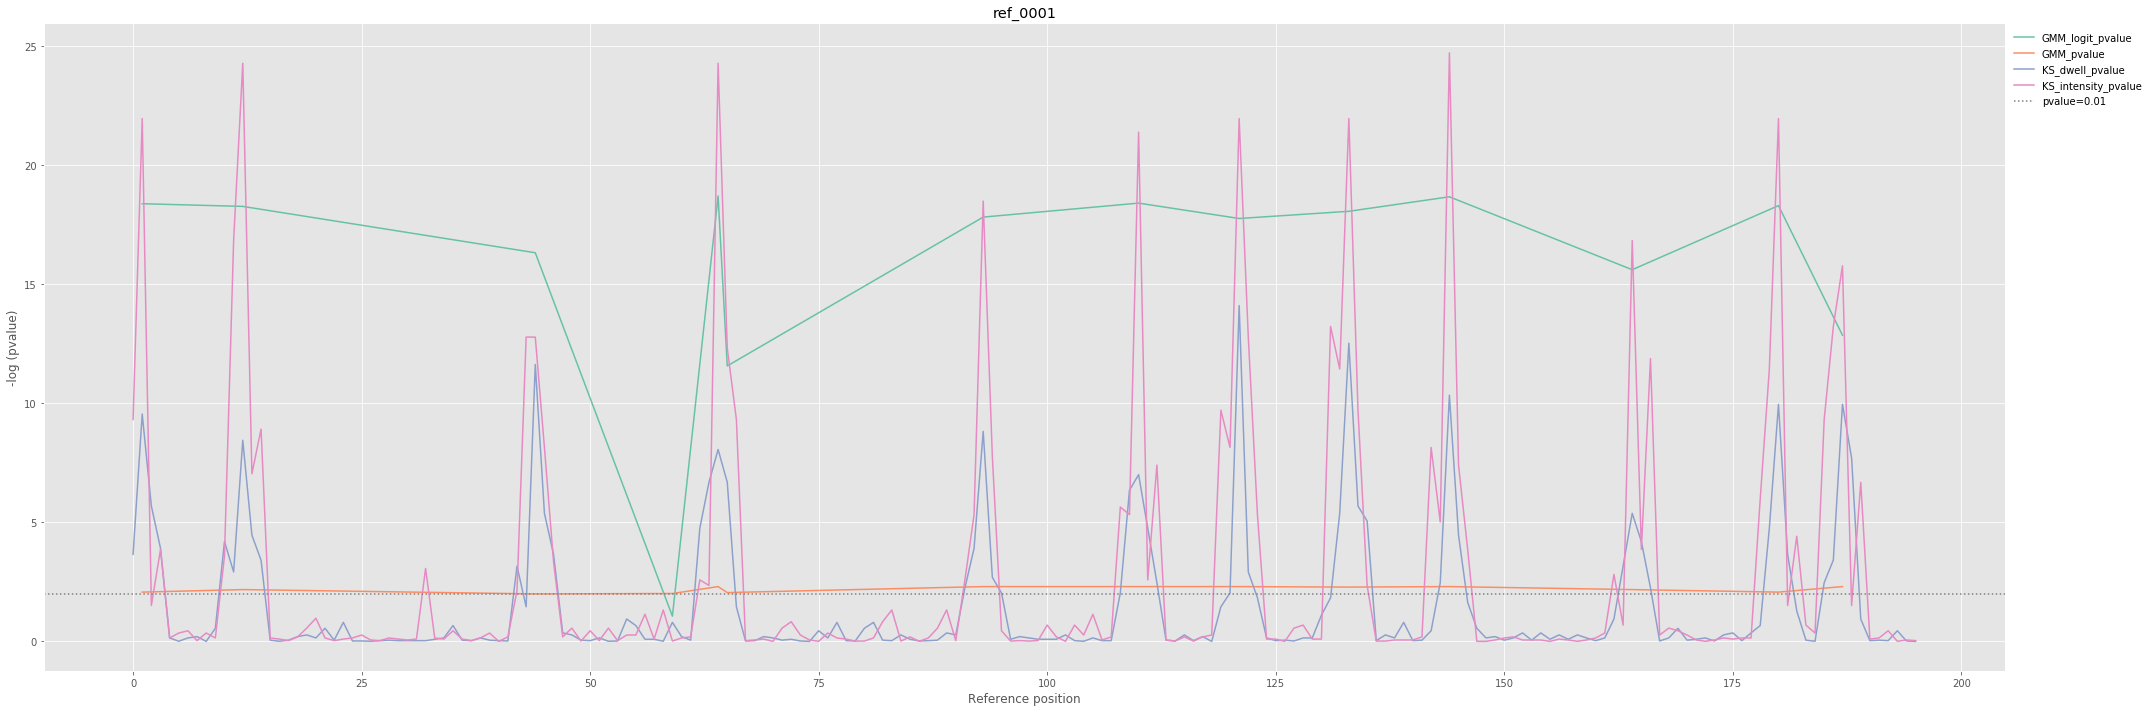

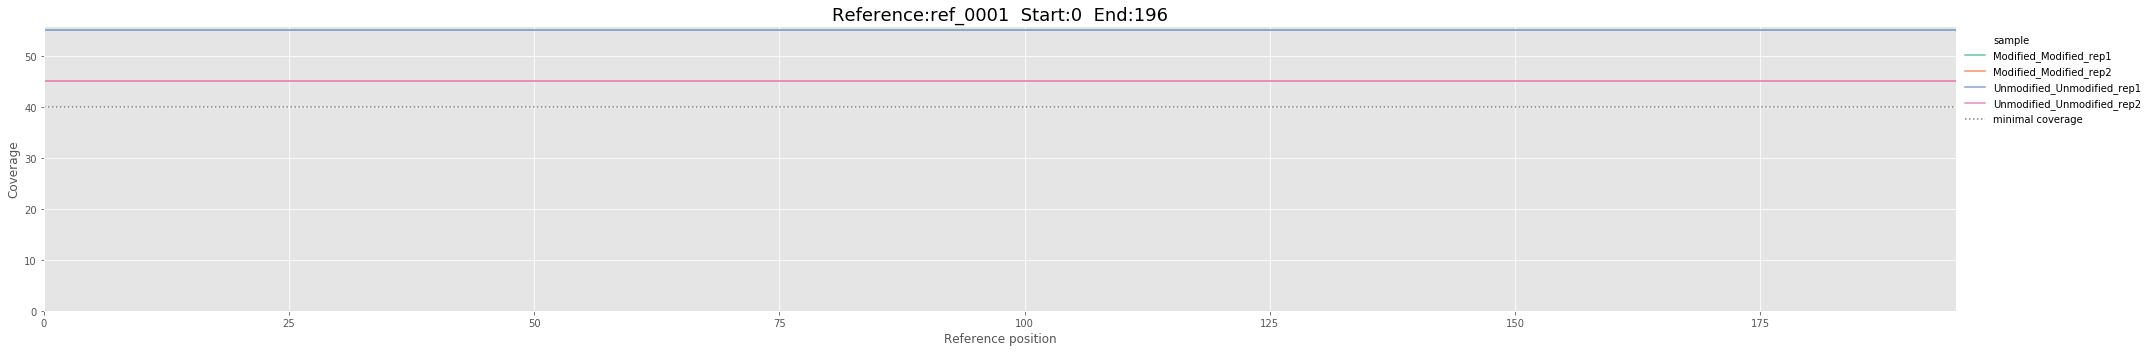

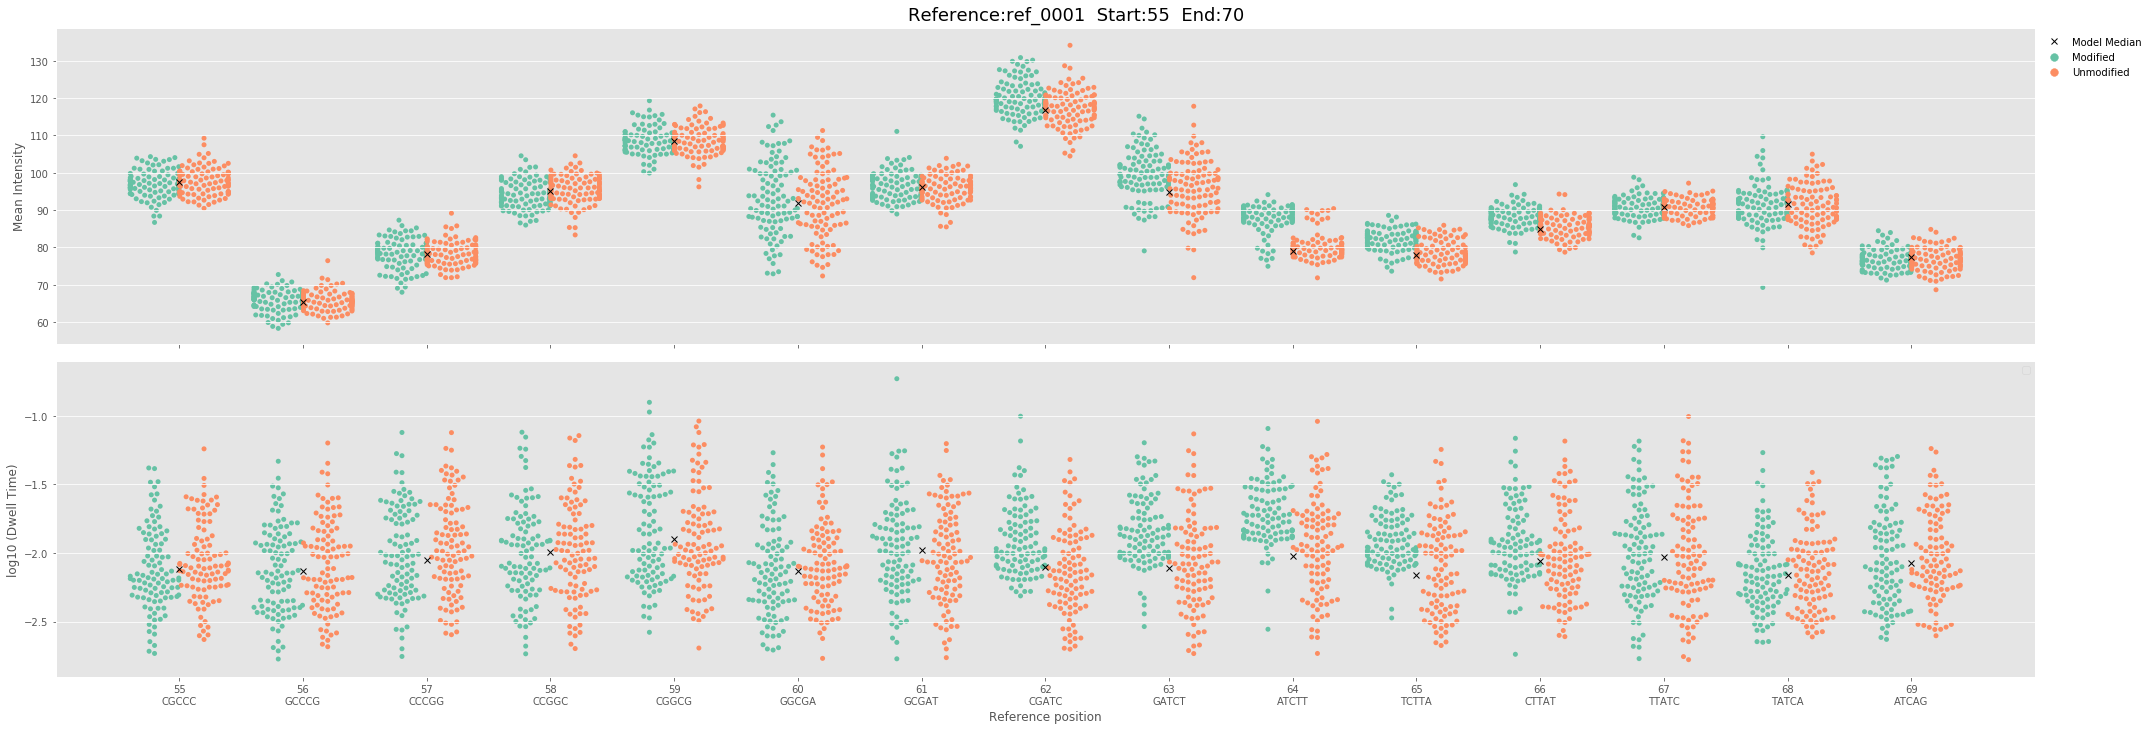

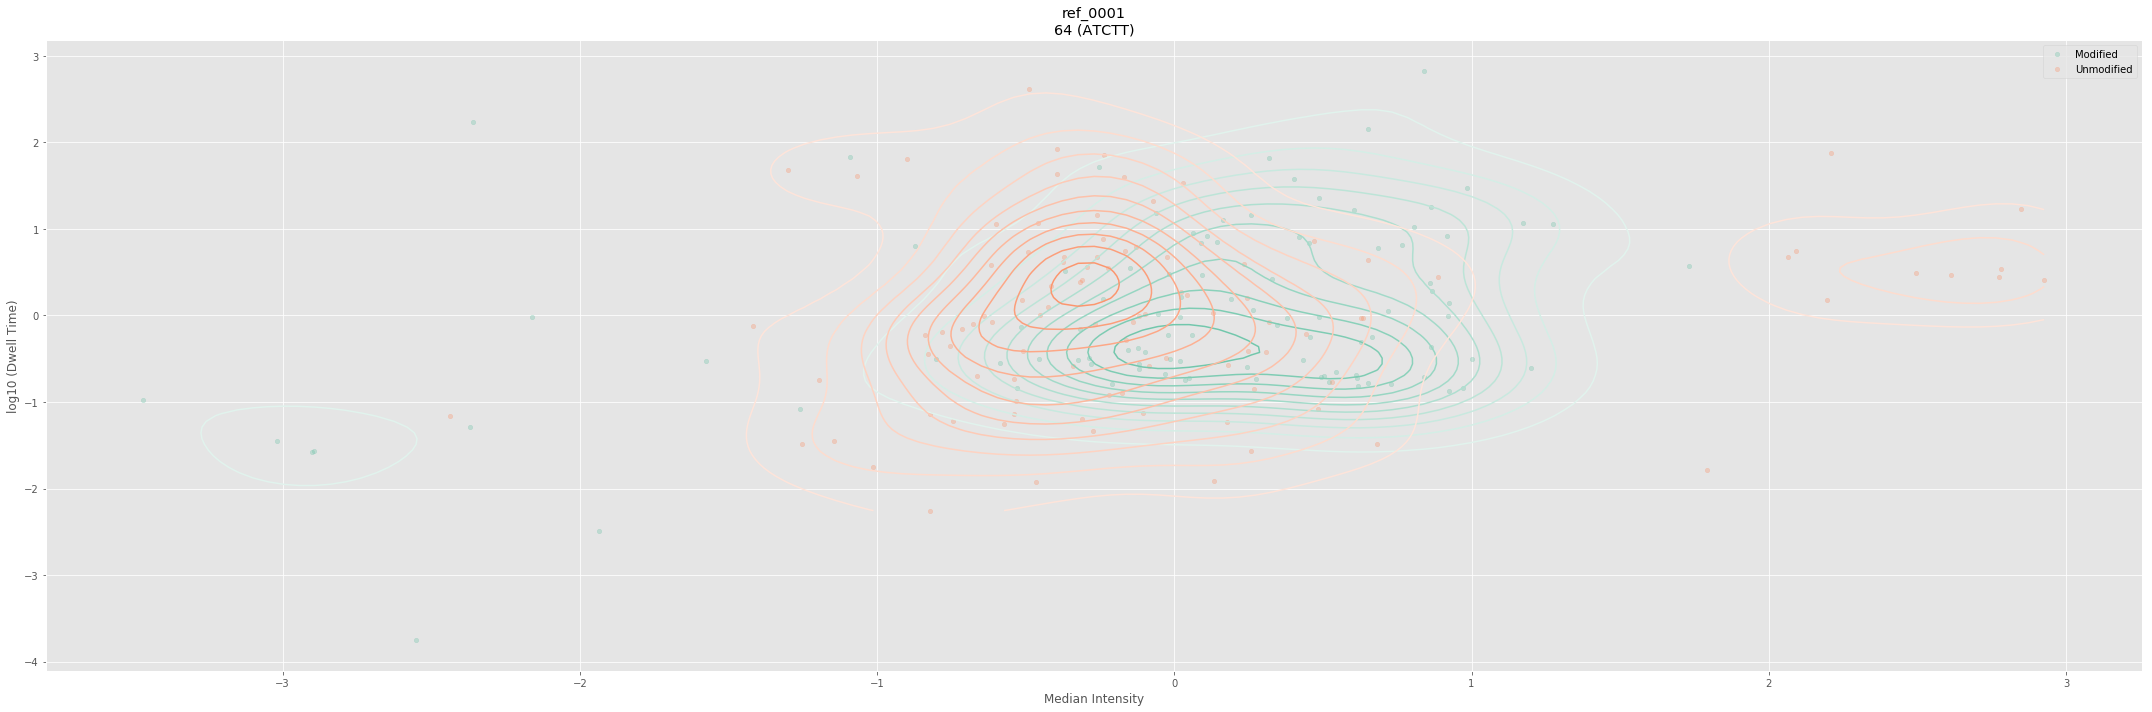

In [7]:
db.plot_pvalue("ref_0001")
db.plot_coverage("ref_0001")
db.plot_signal("ref_0001", 55, 70, kind="swarmplot")
db.plot_position("ref_0001", 64)

#### Using a YAML file instead to specify the files location

In [4]:
# Init the object
s = SampComp (
    eventalign_fn_dict = "./samples.yaml",
    output_db_fn = "./results/out.db",
    fasta_fn = "./reference/ref.fa",
    log_level="debug")

# Run the analysis
db = s ()

Initialise SampComp and checks options
Found duplicated labels in the replicate names. Prefixing with condition name
Initialise Whitelist and checks options
Invalid kmer information not available in index file
Invalid kmer information not available in index file
Invalid kmer information not available in index file
Invalid kmer information not available in index file
Read eventalign index files
	Condition:Modified Sample:Modified_rep1 	valid reads: 275
	Condition:Modified Sample:Modified_rep2 	valid reads: 225
	Condition:Unmodified Sample:Unmodified_rep1 	valid reads: 275
	Condition:Unmodified Sample:Unmodified_rep2 	valid reads: 225
	References found in index: 5
Filter out references with low coverage
	Modified Modified_rep1 Reads: 275	Unmodified Unmodified_rep1 Reads: 275	Modified Modified_rep2 Reads: 225	Unmodified Unmodified_rep2 Reads: 225	valid_ref_id: 5
	References remaining after reference coverage filtering: 5
Start data processing
Adding ref_0000 to in_q
Adding ref_0001 to in_

(<Figure size 2160x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5228e477f0>)

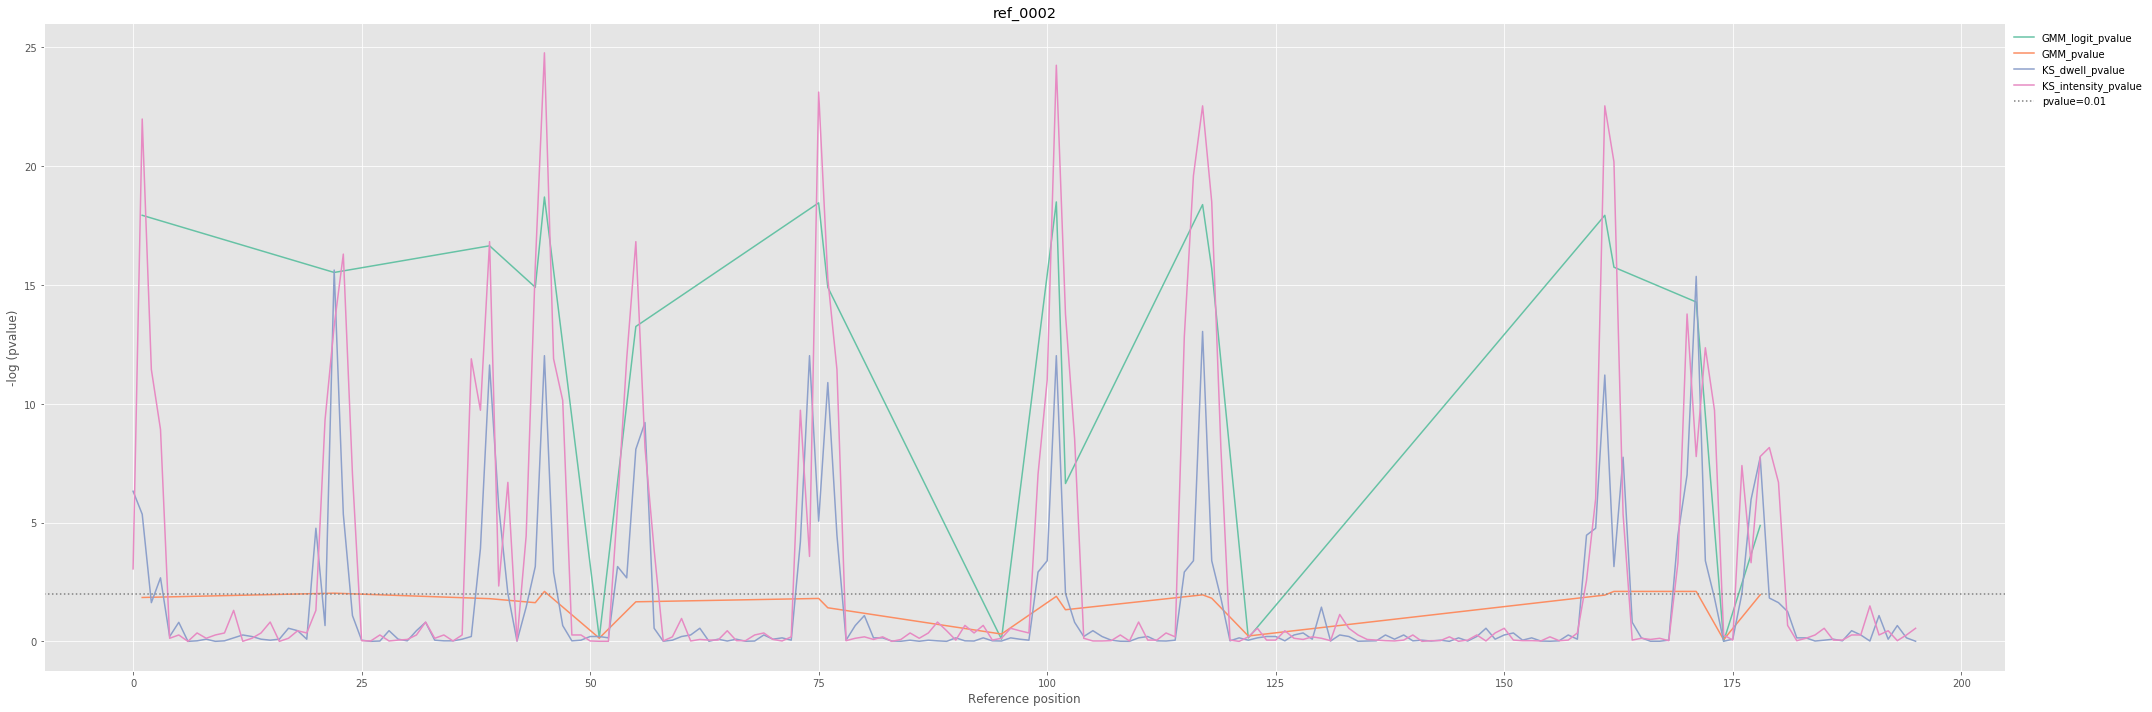

In [5]:
db.plot_pvalue("ref_0002")

## More advanced usage examples

#### Tweaking statistical options

In [9]:
# Init the object
s = SampComp (
    eventalign_fn_dict = "./samples.yaml",
    output_db_fn = "./results/out.db",
    fasta_fn = "./reference/ref.fa",
    comparison_method=["GMM", "MW", "KS", "TT"])
#     sequence_context=2,
#     sequence_context_weights='harmonic')

# Run the analysis
db = s ()

Initialise SampComp and checks options
Initialise Whitelist and checks options
Read eventalign index files
	References found in index: 5
Filter out references with low coverage
	References remaining after reference coverage filtering: 5
Start data processing
100%|██████████| 5/5 [00:22<00:00,  5.12s/ Processed References]


(<Figure size 2160x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd12abf69e8>)

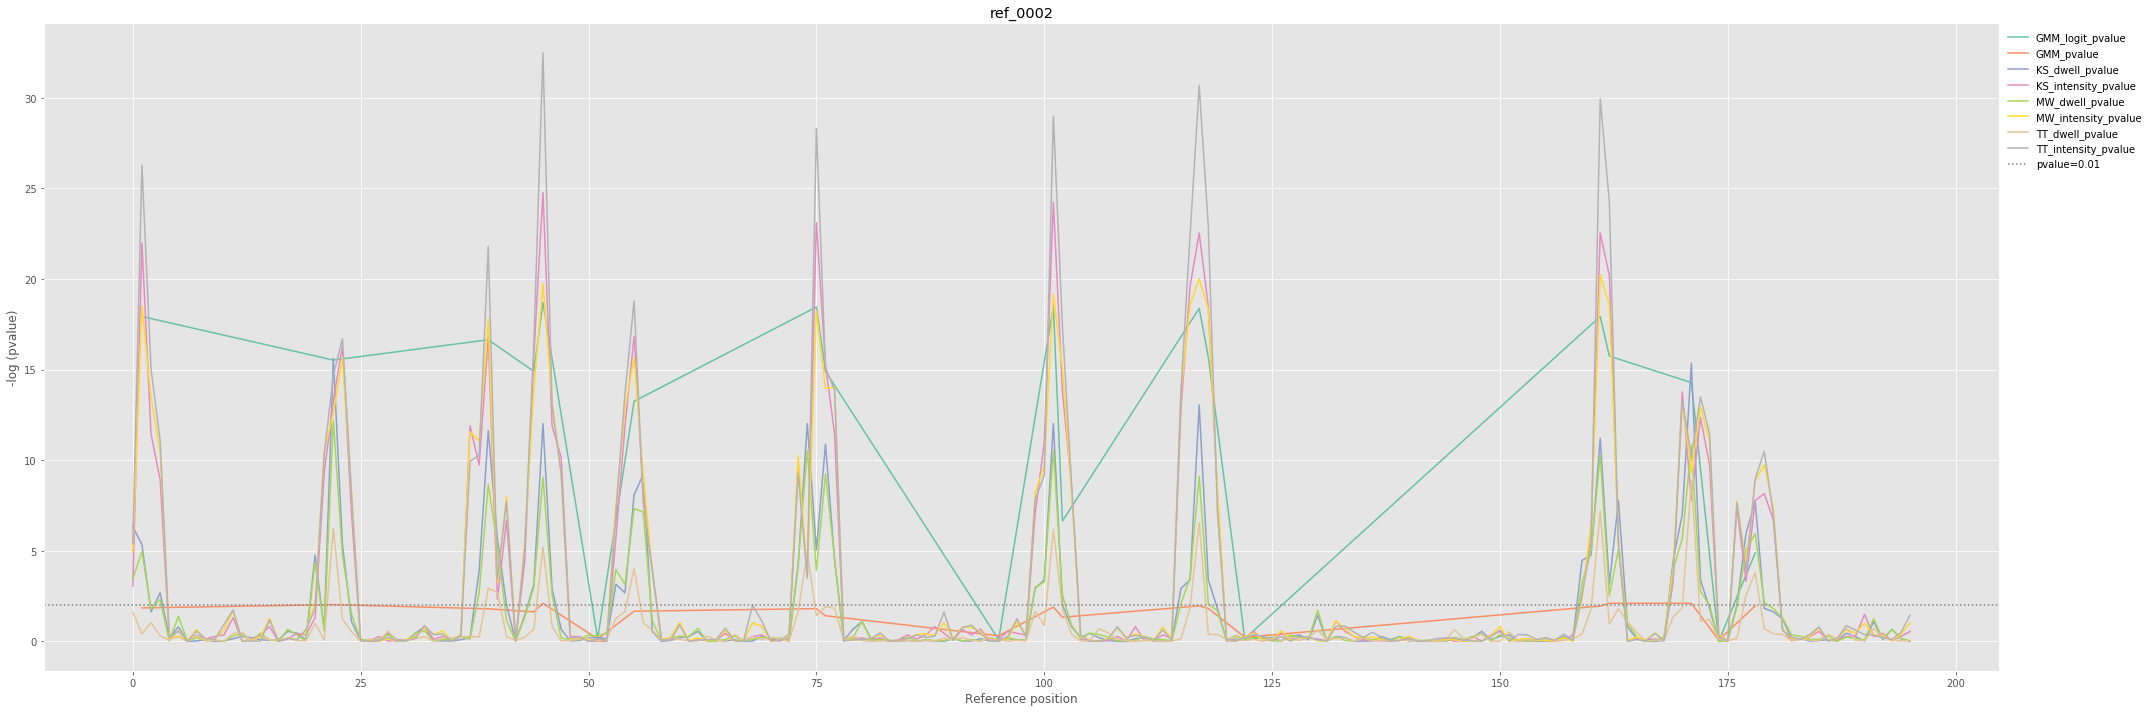

In [10]:
db.plot_pvalue("ref_0002")

(<Figure size 2160x720 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fd12ae901d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fd128472668>))

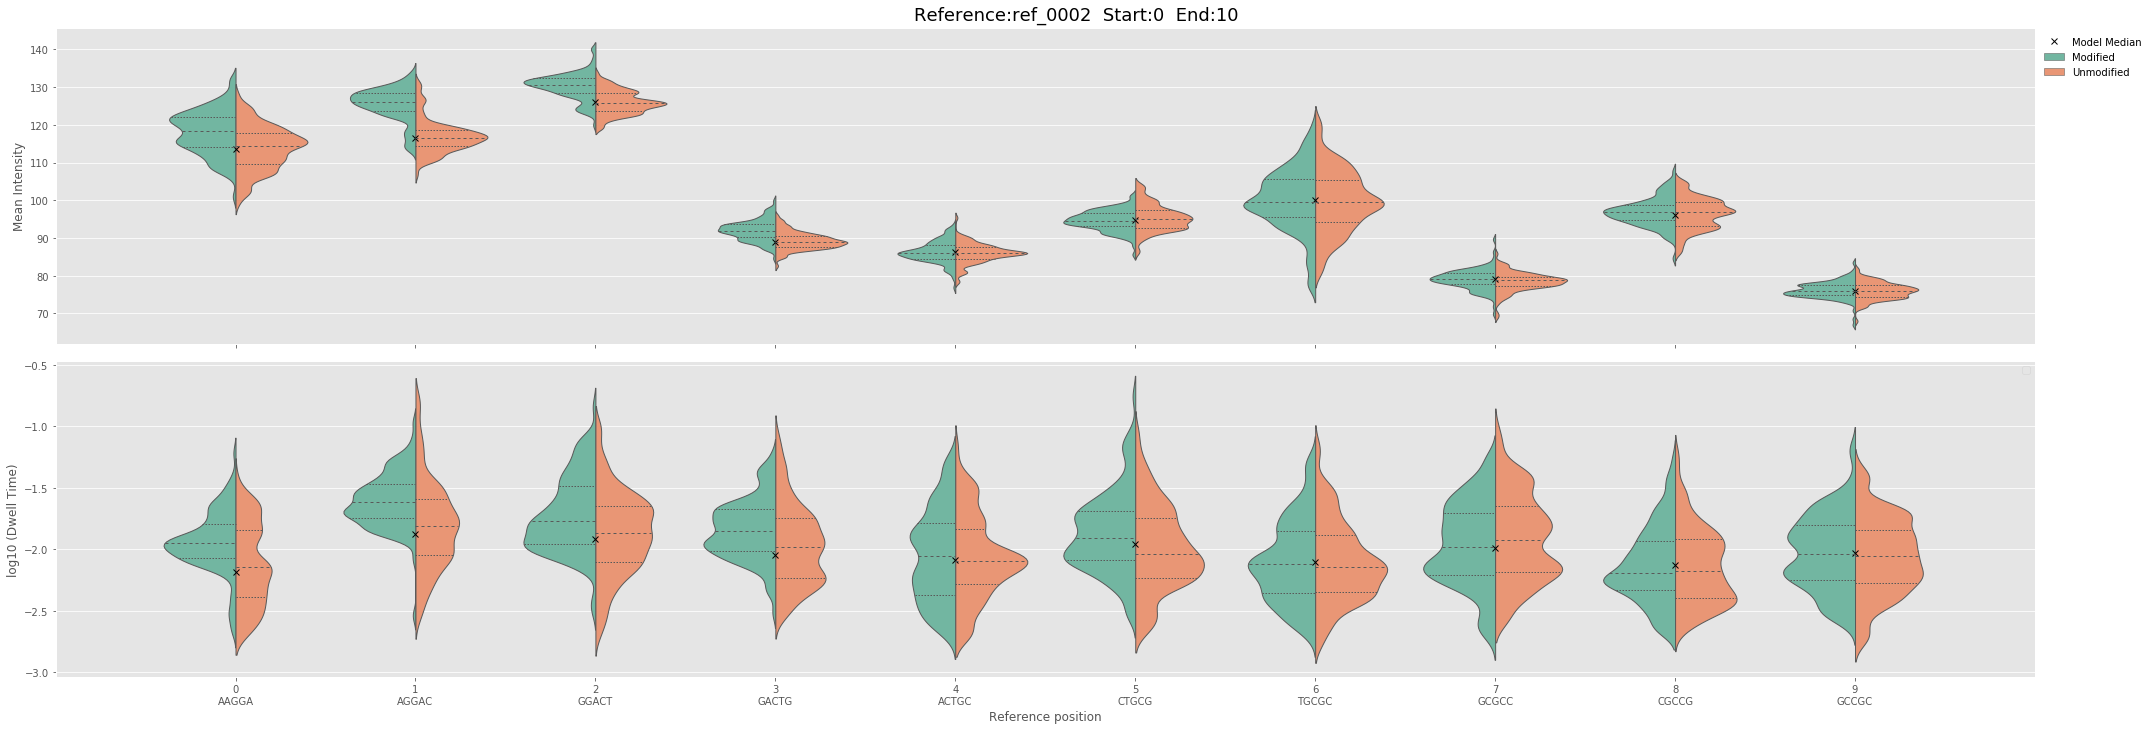

In [11]:
db.plot_signal("ref_0002", 0, 10)

#### Tweaking statistical options

In [12]:
# Init the object
s = SampComp (
    eventalign_fn_dict = "./samples.yaml",
    outpath = "./results",
    fasta_fn = "./reference/ref.fa",
    comparison_method=["GMM", "MW", "KS"],
    sequence_context=2,
    sequence_context_weights='harmonic',
    overwrite=True)

# Run the analysis
db = s ()

Initialise SampComp and checks options
Initialise Whitelist and checks options
Read eventalign index files
	References found in index: 5
Filter out references with low coverage
	References remaining after reference coverage filtering: 5
Start data processing
100%|██████████| 5/5 [00:13<00:00,  2.64s/ Processed References]
Loading SampCompDB
Calculate results


ZeroDivisionError: float division by zero

## Full API documentation

In [2]:
from nanocompore.common import jhelp

jhelp(SampComp)

### nanocompore.SampComp.\__init__

Initialise a `SampComp` object and generates a white list of references with sufficient coverage for subsequent analysis. The retuned object can then be called to start the analysis.

* **eventalign_fn_dict** *: dict or str (required)*

Multilevel dictionnary indicating the condition_label, sample_label and file name of the eventalign_collapse output. 2 conditions are expected and at least 2 sample replicates per condition are highly recommended. One can also pass YAML file describing the samples instead. Example `d = {"S1": {"R1":"path1.tsv", "R2":"path2.tsv"}, "S2": {"R1":"path3.tsv", "R2":"path4.tsv"}}`

* **outpath** *: directory_path (default = results)*

Path to the output folder.

* **outprefix** *: str (default = out_)*

text outprefix for all the files generated by the function.

* **fasta_fn** *: file_path (required)*

Path to a fasta file corresponding to the reference used for read alignment.

* **bed_fn** *: file_path (default = None)*

Path to a BED file containing the annotation of the transcriptome used as reference when mapping.

* **whitelist** *: nancocompore.Whitelist object (default = None)*

Whitelist object previously generated with nanocompore Whitelist. If not given, will be automatically generated.

* **comparison_methods** *: list of str from {MW,KS,TT,GMM} (default = ['GMM', 'KS'])*

Statistical method to compare the 2 samples (mann_whitney or MW, kolmogorov_smirnov or KS, t_test or TT, gaussian_mixture_model or GMM). This can be a list or a comma separated string.

* **logit** *: bool (default = True)*

Force logistic regression even if we have less than 2 replicates in any condition.

* **allow_warnings** *: bool (default = False)*

If True runtime warnings during the ANOVA tests don't raise an error.

* **sequence_context** *: int (default = 0)*

Extend statistical analysis to contigous adjacent base if available.

* **sequence_context_weights** *: str {uniform,harmonic} (default = uniform)*

type of weights to used for combining p-values.

* **min_coverage** *: int (default = 30)*

minimal read coverage required in all sample.

* **downsample_high_coverage** *: int (default = 0)*

For reference with higher coverage, downsample by randomly selecting reads.

* **max_invalid_kmers_freq** *: float (default = 0.1)*

maximum frequency of NNNNN, mismatching and missing kmers in reads.

* **select_ref_id** *: list or str (default = [])*

if given, only reference ids in the list will be selected for the analysis.

* **exclude_ref_id** *: list or str (default = [])*

if given, refid in the list will be excluded from the analysis.

* **nthreads** *: int <= 3 (default = 3)*

Number of threads (two are used for reading and writing, all the others for parallel processing).

* **log_level** *: str {warning,info,debug} (default = info)*

Set the log level.

